# Travelling salesman

simulated annealind을 이용해서 다음의 20개의 도시를 한번씩 방문하는 최단 거리를 구하세요.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

#x=[random.randint(0,10) for i in range(10)]
#y=[random.randint(0,10) for i in range(10)]
x=[0, 10, 9, 5, 10, 5, 4, 2, 8, 9]
y=[10, 0, 6, 8, 4, 3, 2, 7, 3, 2]

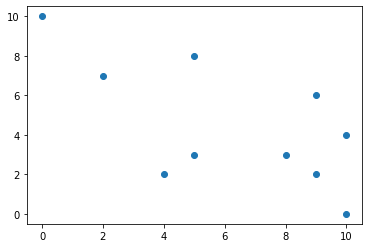

In [2]:
plt.plot(x,y,'o')

예를 들어 위의 도시를 다음의 순서로 방문했다고 생각해 봅시다. 이 때 총 이동거리는 구해봅시다.

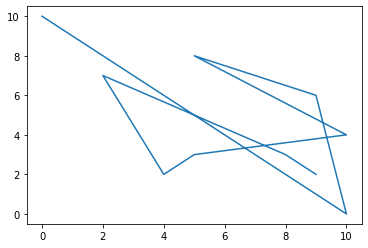

In [3]:
plt.plot(x,y)

In [4]:
def dist(x,y):
    z=0
    for i in range(9):
        z+=np.sqrt((x[i+1]-x[i])**2+(y[i+1]-y[i])**2)
    return z
dist(x,y)

51.623872342863045

In [5]:
def de(i,j,x,y):
    nx, ny = x[:], y[:]
    nx[i], nx[j] = nx[j], nx[i]
    ny[i], ny[j] = ny[j], ny[i]
    return dist(nx,ny)-dist(x,y)

In [6]:
import random

def swap(x,y,b):
    i=random.randint(0,9)
    j=random.randint(0,9)
    delta=de(i,j,x,y)
    if(delta<0):
        x[i], x[j] = x[j], x[i]
        y[i], y[j] = y[j], y[i]
    else:
        if(random.random()<np.exp(-b*delta)):
            x[i], x[j] = x[j], x[i]
            y[i], y[j] = y[j], y[i]
    return x,y

29.763415117343843


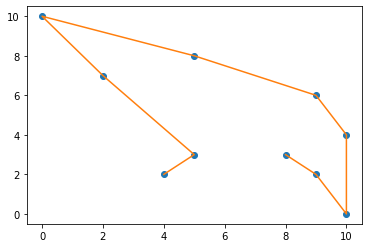

In [11]:
for i in range(50000):
    x,y=swap(x,y,1)
    
print(dist(x,y))
plt.plot(x,y,'o')
plt.plot(x,y)

27.13528662097143


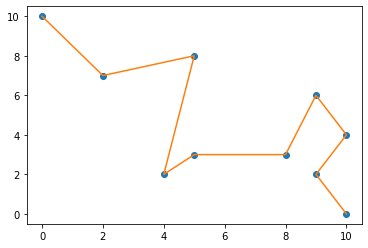

In [12]:
Tmax=20
tau=1000
for t in range(50000):
    T=Tmax*np.exp(-t/tau)
    b=1/T
    swap(x,y,b)

print(dist(x,y))    
plt.plot(x,y,'o')
plt.plot(x,y)
plt.show()